In [14]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict
from random import randint

class AgentState(TypedDict):
    name:str
    guesses:list[int]
    attempts:int
    lower_bound:int
    upper_bound:int
    target_number:int

In [15]:
def setup(state:AgentState):
    print(f"Welcome to the game {state['name']}")
    state['guesses'] = []
    state['target_number'] = randint(1,20)
    state['attempts'] = 0
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    return state

In [16]:
def guess(state:AgentState):
    ## make a choice between and including lower_bound and upper_bound
    ## attach it to guesses and then send it to hint node
    rand_guess= randint(state['lower_bound'],state['upper_bound'])
    state['attempts']+=1
    print(f"Attempt no. {state['attempts']}")
    print(f"Now my guess is : {rand_guess}")
    state['guesses'].append(rand_guess)
    return state

def hint_node(state:AgentState):
    ## if last guess = target then end
    if state['guesses'][-1] == state['target_number']:
        print(f"I got it, I guessed : {state['guesses'][-1]} which is same as target = {state['target_number']}")
        print(f"Took me {state['attempts']} attempts")
        return state
    
    if state['guesses'][-1] < state['target_number']:
        state['lower_bound'] = state['guesses'][-1]+1
    elif state['guesses'][-1] > state['target_number']:
        state['upper_bound'] = state['guesses'][-1]-1
    print(f"Alr, now searching for range: [{state['lower_bound']},{state['upper_bound']}]")
    return state

def decide(state:AgentState):
    if state['guesses'][-1] == state['target_number'] or state['attempts']>=7:
        return "endit"
    
    return "continue"

In [17]:
graph = StateGraph(AgentState)
graph.add_node("Setup",setup)
graph.add_node("guess",guess)
graph.add_node("hint_node",hint_node)

graph.add_edge(START,"Setup")
graph.add_edge("Setup","guess")
graph.add_edge("guess","hint_node")

graph.add_conditional_edges(
    "hint_node",
    decide,
    {
        "continue":"guess",
        "endit":END
    }
)
build = graph.compile()

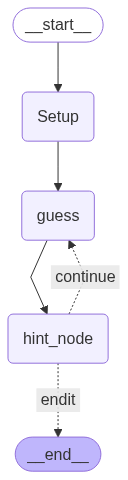

In [18]:
from IPython.display import display,Image
display(Image(build.get_graph().draw_mermaid_png()))

In [19]:
result = build.invoke({"name": "Baveet", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20,"target_number":"-5"})

Welcome to the game Baveet
Attempt no. 1
Now my guess is : 17
Alr, now searching for range: [1,16]
Attempt no. 2
Now my guess is : 15
I got it, I guessed : 15 which is same as target = 15
Took me 2 attempts
